# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [40]:
# Mostrar tipos antes da transformação
print("Tipos de dados antes da transformação:")
print(df.dtypes)

# Converter colunas binárias para booleano (Sim/Não)
df['Idoso'] = df['Idoso'].astype(bool)  # 0 -> False, 1 -> True
df['Casado'] = df['Casado'].map({'Yes': True, 'No': False})
df['Dependents'] = df['Dependents'].map({'Yes': True, 'No': False})
df['PhoneService'] = df['PhoneService'].map({'Yes': True, 'No': False})
df['Servico_Seguranca'] = df['Servico_Seguranca'].map({'Yes': True, 'No': False})
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].map({'Yes': True, 'No': False})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': True, 'No': False})
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

# Converter colunas para categoria onde há múltiplas opções
df['Genero'] = df['Genero'].astype('category')
df['Servico_Internet'] = df['Servico_Internet'].astype('category')
df['Tipo_Contrato'] = df['Tipo_Contrato'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')

# Mostrar tipos depois da transformação
print("\nTipos de dados depois da transformação:")
print(df.dtypes)


Tipos de dados antes da transformação:
customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

Tipos de dados depois da transformação:
customerID              object
Genero                category
Idoso                     bool
Casado                    bool
Dependents                bool
Tempo_como_Cliente       int64
PhoneService            object
Servico_Internet      category
Servico_Seguranca       object
Suporte_Tecnico         object
StreamingTV             object
Tipo_Contrato         category
PaymentMethod         category
Pagamento_Mensal       

### Justificativas

**Conversão de colunas booleanas:** Colunas com respostas binárias, como "Idoso", "Casado", "Dependents", "PhoneService", "Servico_Seguranca", "Suporte_Tecnico", "StreamingTV" e "Churn", foram convertidas para valores booleanos (True/False). Esse tipo de conversão facilita a manipulação e análise, permitindo que esses campos sejam tratados como variáveis lógicas, o que é adequado para dados que representam presença/ausência ou respostas afirmativas/negativas.

**Conversão de colunas categóricas:** Colunas com múltiplas categorias distintas, como "Genero", "Servico_Internet", "Tipo_Contrato" e "PaymentMethod", foram convertidas para o tipo categoria. Isso é mais eficiente em termos de memória e processamento, pois o tipo categórico ocupa menos espaço e agiliza operações analíticas. Essa abordagem é adequada para variáveis nominais, nas quais cada valor representa uma categoria sem ordem implícita.

**Manutenção do formato numérico:** Colunas numéricas como "Pagamento_Mensal" e "Total_Pago" estão no formato float64, que é ideal para dados financeiros devido à sua precisão e capacidade de lidar com casas decimais. Esse formato foi mantido para assegurar cálculos financeiros precisos.


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [41]:
# A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.
missing_data = df.isnull().mean() * 100
print("Porcentagem de dados faltantes por coluna:")
print(missing_data[missing_data > 0])

Porcentagem de dados faltantes por coluna:
Genero                0.48
PhoneService         59.28
Servico_Seguranca    21.12
Suporte_Tecnico      21.12
StreamingTV          21.12
Pagamento_Mensal     13.00
Churn                 0.20
dtype: float64


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [42]:
# Definindo as colunas onde a ausência de dados resulta na exclusão de linhas
colunas_exclusao = ['customerID', 'Churn', 'Tempo_como_Cliente']

# Excluindo as linhas onde há dados faltantes nas colunas selecionadas
df = df.dropna(subset=colunas_exclusao)

print(f"Linhas restantes após exclusão: {df.shape[0]}")


Linhas restantes após exclusão: 2495


### Justificativas para Exclusão de Linhas com Dados Faltantes em Algumas Colunas

**CustomerID:** Como esse campo é um identificador único, é fundamental para diferenciar os clientes. Linhas com valores ausentes aqui seriam excluídas, pois não temos como identificar a qual cliente pertencem esses dados, comprometendo a integridade do registro.

**Churn:** Essa é a nossa variável alvo para entender se o cliente deixou ou não a empresa, essencial em análises preditivas de retenção. Se valores estão ausentes nesta coluna, eles devem ser removidos, pois não contribuem para o aprendizado do modelo.

**Tempo_como_Cliente:** Esse campo é importante para entender a fidelidade e o histórico do cliente com a empresa, sendo um indicador importante para análises de churn. Linhas sem esse dado podem ser excluídas, uma vez que a ausência desse histórico compromete a análise.


C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

### Escolha entre Média, Mediana e Moda para Substituir Valores Faltantes

A escolha entre média, mediana e moda para substituir valores faltantes em um DataFrame depende da distribuição dos dados e da natureza dos dados. Aqui está um guia sobre como decidir qual estatística usar, junto com um exemplo prático de como verificar a distribuição dos dados.

1. **Média**
   - **Quando usar:** A média é apropriada quando a distribuição dos dados é simétrica e não tem outliers significativos. Ela representa bem o centro dos dados em uma distribuição normal.
   - **Cuidado:** A média é sensível a outliers, o que pode distorcer a representação do dado.

2. **Mediana**
   - **Quando usar:** A mediana é mais robusta e deve ser usada em distribuições assimétricas ou quando há outliers. Ela divide o conjunto de dados ao meio, representando o valor central.
   - **Cuidado:** A mediana pode não representar bem conjuntos de dados que são simétricos e não têm outliers, onde a média seria mais informativa.

3. **Moda**
   - **Quando usar:** A moda é útil para dados categóricos ou quando se deseja identificar a categoria mais comum. É a única medida que pode ser usada para dados nominais.
   - **Cuidado:** A moda pode ser menos informativa em conjuntos de dados com muitas categorias ou quando não há uma categoria predominante.


### Decisão

- Se a distribuição for simétrica e não tiver outliers, a média é uma boa escolha.
- Se a distribuição for assimétrica ou apresentar outliers, escolha a mediana.
- Para dados categóricos, sempre utilize a moda.


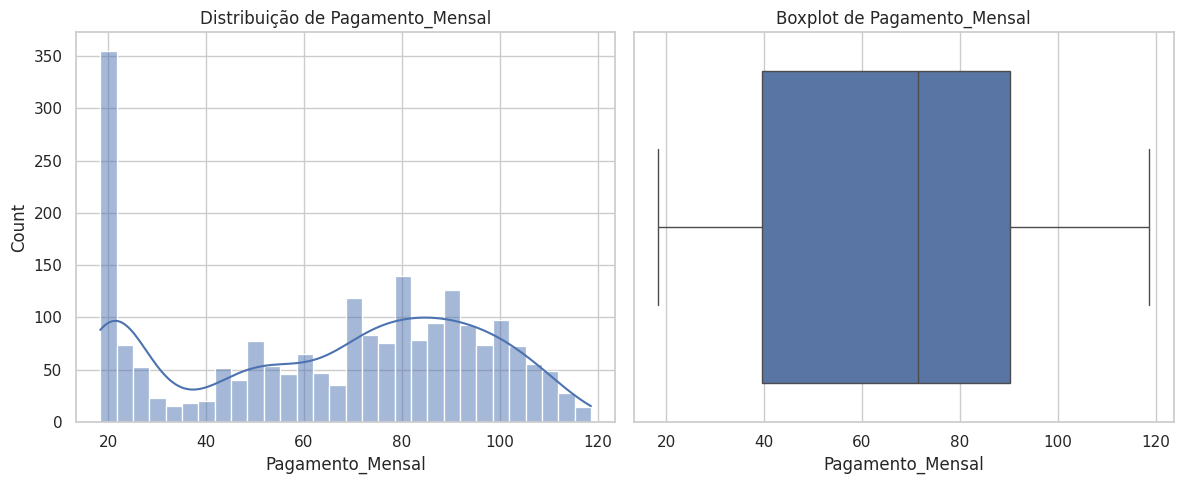

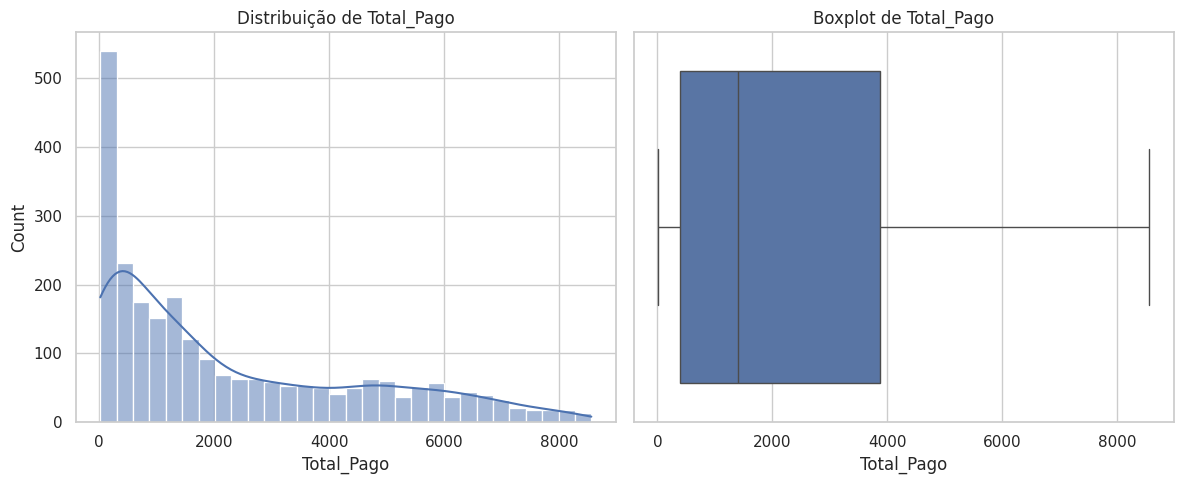

In [43]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando uma figura com subplots
plt.figure(figsize=(12, 5))

# Gráfico para Pagamento_Mensal
plt.subplot(1, 2, 1)
sns.histplot(df['Pagamento_Mensal'], bins=30, kde=True)
plt.title('Distribuição de Pagamento_Mensal')

# Boxplot para Pagamento_Mensal
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Pagamento_Mensal'])
plt.title('Boxplot de Pagamento_Mensal')

plt.tight_layout()
plt.show()

# Repetir para Total_Pago
plt.figure(figsize=(12, 5))

# Gráfico para Total_Pago
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Pago'], bins=30, kde=True)
plt.title('Distribuição de Total_Pago')

# Boxplot para Total_Pago
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Pago'])
plt.title('Boxplot de Total_Pago')

plt.tight_layout()
plt.show()

### Análise e Justificativas para Substituição

#### Colunas Numéricas:

- **Pagamento_Mensal e Total_Pago**: Para essas colunas, vamos analisar a distribuição dos dados usando gráficos e estatísticas descritivas. Se a distribuição for simétrica, a média pode ser utilizada, enquanto que, se a distribuição for assimétrica, a mediana é mais apropriada, pois é menos afetada por outliers.


In [44]:
# Iterando sobre as colunas do DataFrame
for col in df.columns:
    if df[col].dtype in ['object', 'category', 'bool']:  # Verifica se a coluna é do tipo object ou category ou bool
        moda = df[col].mode()[0]  # Calcula a moda
        # Substitui valores faltantes pela moda usando .loc
        df.loc[df[col].isnull(), col] = moda

# Para variáveis numéricas, substituímos por mediana usando .loc
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    median_value = df[col].median()  # Calcula a mediana
    df.loc[df[col].isnull(), col] = median_value  # Substitui valores faltantes pela mediana

#### Colunas não numéricas:

Para essas colunas, devemos verificar a frequência de cada categoria e substituir os valores faltantes pela moda, que é a categoria mais comum.


### Justificativa Geral para Substituições

- **Média/Mediana para Variáveis Numéricas:** A mediana foi escolhida para substituir os valores faltantes em colunas numéricas devido à sua robustez contra outliers. Ela fornece uma representação mais precisa da tendência central quando os dados têm uma distribuição assimétrica.

- **Moda para Variáveis Categóricas:** A moda foi utilizada para colunas categóricas, pois representa a categoria mais frequente, o que é mais representativo para dados com valores discretos. Isso mantém a consistência dos dados e evita a perda de informações que poderia ocorrer ao remover linhas.


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [50]:
# Dicionário para armazenar valores únicos
unique_values = {}

# Iterando sobre as colunas do DataFrame
for col in df.columns:
    if df[col].dtype in ['object', 'category']:  # Verifica se a coluna é do tipo object ou category
        unique_values[col] = df[col].unique()  # Armazena os valores únicos da coluna

# Exibindo os valores únicos
for col, values in unique_values.items():
    print(f"Valores únicos em '{col}': {values}")

# Corrigindo valores da coluna 'Genero'
df['Genero'] = df['Genero'].str.lower()  # Converte todos os valores para minúsculas
df.loc[df['Genero'].isin(['f', 'female']), 'Genero'] = 'female'
df.loc[df['Genero'].isin(['m', 'male']), 'Genero'] = 'male'

# Corrigindo valores da coluna 'Servico_Internet'
df['Servico_Internet'] = df['Servico_Internet'].str.lower()  # Converte para minúsculas
df['Servico_Internet'] = df['Servico_Internet'].replace({'no': 'no', 'dsl': 'dsl', 'fiber optic': 'fiber optic'})  # Substitui os valores

# Corrigindo valores da coluna 'Tipo_Contrato'
df['Tipo_Contrato'] = df['Tipo_Contrato'].str.lower()  # Converte para minúsculas
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace({'month-to-month': 'month-to-month', 'one year': 'one year', 'two year': 'two year'})  # Substitui os valores

# Corrigindo valores da coluna 'PaymentMethod'
df['PaymentMethod'] = df['PaymentMethod'].str.lower()  # Converte para minúsculas
df['PaymentMethod'] = df['PaymentMethod'].replace({
    'electronic check': 'electronic check',
    'mailed check': 'mailed check',
    'bank transfer (automatic)': 'bank transfer (automatic)',
    'credit card (automatic)': 'credit card (automatic)'
})  # Substitui os valores

# Checando os valores únicos após as correções
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        print(f"Valores únicos corrigidos em '{col}': {df[col].unique()}")


Valores únicos em 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
Valores únicos em 'Genero': ['female', 'male']
Categories (7, object): ['F', 'Female', 'M', 'Male', 'f', 'female', 'male']
Valores únicos em 'PhoneService': [False True]
Valores únicos em 'Servico_Internet': ['dsl' 'fiber optic' 'no']
Valores únicos em 'Servico_Seguranca': [False True]
Valores únicos em 'Suporte_Tecnico': [False True]
Valores únicos em 'StreamingTV': [False True]
Valores únicos em 'Tipo_Contrato': ['month-to-month' 'one year' 'two year']
Valores únicos em 'PaymentMethod': ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
Valores únicos em 'Churn': [False True]
Valores únicos corrigidos em 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
Valores únicos corrigidos em 'Genero': ['female' 'male']
Valores únicos corrigidos em 'PhoneService': [False True]
Valores únicos 

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando como esta

In [51]:
# Dicionário de renomeação para inglês
new_column_names = {
    'customerID': 'CustomerID',
    'Genero': 'Gender',
    'Idoso': 'IsElderly',
    'Casado': 'IsMarried',
    'Dependents': 'HasDependents',
    'Tempo_como_Cliente': 'Tenure',
    'PhoneService': 'PhoneService',
    'Servico_Internet': 'InternetService',
    'Servico_Seguranca': 'SecurityService',
    'Suporte_Tecnico': 'TechnicalSupport',
    'StreamingTV': 'StreamingTV',
    'Tipo_Contrato': 'ContractType',
    'PaymentMethod': 'PaymentMethod',
    'Pagamento_Mensal': 'MonthlyPayment',
    'Total_Pago': 'TotalPaid',
    'Churn': 'Churn'
}

# Renomeando as colunas
df.rename(columns=new_column_names, inplace=True)


### Vantagens de Usar uma Só Língua

- **Consistência:** Facilita a leitura e interpretação dos dados, especialmente se outras pessoas que falam diferentes idiomas trabalharem com você.
- **Clareza:** A utilização de uma única língua evita confusões que podem surgir com termos em diferentes idiomas.
